# Homework 4
### Talha Muhammad 
### October, 22nd 2017


### Questions
#### 1. Create lists & graphs of the best and worst places to swim in the dataset.
#### 2. The testing of water quality can be sporadic. Which sites have been tested most regularly?
#### 3. Which ones have long gaps between tests? Pick out 5-10 sites and visually compare how regularly their water quality is tested.
#### 4. Is there a relationship between the amount of rain and water quality? Show this relationship graphically.
#### 5. If you can, estimate the effect of rain on quality at different sites and create a visualization to compare them.

This is notebook file for conducting analysis for homework 4
The analysis looks at Enterococcus levels in the Hudson River, using data from the
organization Riverkeeper (http:www.riverkeeper.org)

Load all the libraries and conduct the analysis

In [1]:
import pandas as pd
import seaborn as sns
import bokeh as bk
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [2]:
river_data = pd.read_csv('Data/riverkeeper_data_2013.csv')

see the head and tail of the dataset

In [3]:
river_data.head(n=10)


,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,10/16/2011,1733,1.5,35
1,Hudson above Mohawk River,10/21/2013,4,0.2,35
2,Hudson above Mohawk River,9/21/2013,20,0.0,35
3,Hudson above Mohawk River,8/19/2013,6,0.0,35
4,Hudson above Mohawk River,7/21/2013,31,0.0,35
5,Hudson above Mohawk River,6/4/2013,238,1.2,35
6,Hudson above Mohawk River,10/15/2012,23,1.4,35
7,Hudson above Mohawk River,9/15/2012,11,0.1,35
8,Hudson above Mohawk River,8/18/2012,15,0.3,35
9,Hudson above Mohawk River,7/21/2012,6,0.2,35


In [4]:
river_data.tail(n=10)

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
3387,Gowanus Canal,6/19/2009,160,2.3,37
3388,Gowanus Canal,5/29/2009,17329,0.5,37
3389,Gowanus Canal,10/15/2008,20,0.0,37
3390,Gowanus Canal,7/23/2008,5790,1.0,37
3391,Gowanus Canal,5/16/2008,>24196,1.0,37
3392,Gowanus Canal,9/6/2007,<10,0.0,37
3393,Gowanus Canal,8/16/2007,35,0.0,37
3394,Gowanus Canal,7/11/2007,238,1.0,37
3395,Gowanus Canal,6/18/2007,6,0.0,37
3396,Gowanus Canal,6/10/2010,882,0.9,37


In [5]:
river_data.dtypes

Site                 object
Date                 object
EnteroCount          object
FourDayRainTotal    float64
SampleCount           int64
dtype: object

A couple of things here: 1) we need to first change non numeric characters from enterocount, and to convert to numeric data type and to convert date field to date 

In [6]:
river_data['EnteroCount'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

used the reference below for the above code
https://stackoverflow.com/questions/13682044/pandas-dataframe-remove-unwanted-parts-from-strings-in-a-column


In [7]:
river_data.tail(n=10)

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
3387,Gowanus Canal,6/19/2009,160,2.3,37
3388,Gowanus Canal,5/29/2009,17329,0.5,37
3389,Gowanus Canal,10/15/2008,20,0.0,37
3390,Gowanus Canal,7/23/2008,5790,1.0,37
3391,Gowanus Canal,5/16/2008,24196,1.0,37
3392,Gowanus Canal,9/6/2007,10,0.0,37
3393,Gowanus Canal,8/16/2007,35,0.0,37
3394,Gowanus Canal,7/11/2007,238,1.0,37
3395,Gowanus Canal,6/18/2007,6,0.0,37
3396,Gowanus Canal,6/10/2010,882,0.9,37


In [8]:
river_data['Date']=pd.to_datetime(river_data['Date'],format='%m/%d/%Y')

In [9]:
river_data.dtypes

Site                        object
Date                datetime64[ns]
EnteroCount                 object
FourDayRainTotal           float64
SampleCount                  int64
dtype: object

In [10]:
river_data['EnteroCount']=pd.to_numeric(river_data['EnteroCount'],errors='ignore')

In [11]:
river_data.dtypes

Site                        object
Date                datetime64[ns]
EnteroCount                  int64
FourDayRainTotal           float64
SampleCount                  int64
dtype: object

#### Begin to answer questions from above


In [12]:
#1. Best and worst places to swim in the hudson
summary=river_data.groupby('Site').mean()

In [13]:
#Best places to swim
summary.sort_values(by='EnteroCount').head(n=5)

,EnteroCount,FourDayRainTotal,SampleCount
Site,,,
Poughkeepsie Drinking Water Intake,8.342105,0.350000,38.0
Croton Point Beach,15.458333,0.464583,48.0
Stony Point mid-channel,17.340909,0.461364,44.0
Little Stony Point,17.526316,0.368421,38.0
Poughkeepsie Launch Ramp,17.675676,0.318919,37.0


In [14]:
#Worst places to swim
summary.sort_values(by='EnteroCount').tail(n=5)

,EnteroCount,FourDayRainTotal,SampleCount
Site,,,
Upper Sparkill Creek,1296.072727,0.526061,165.0
Saw Mill River,1455.760000,0.742000,50.0
Tarrytown Marina,2205.666667,0.814815,27.0
Newtown Creek- Metropolitan Ave. Bridge,2953.684211,0.852632,57.0
Gowanus Canal,4206.837838,0.816216,37.0


In [15]:
summary=summary.add_suffix('').reset_index()

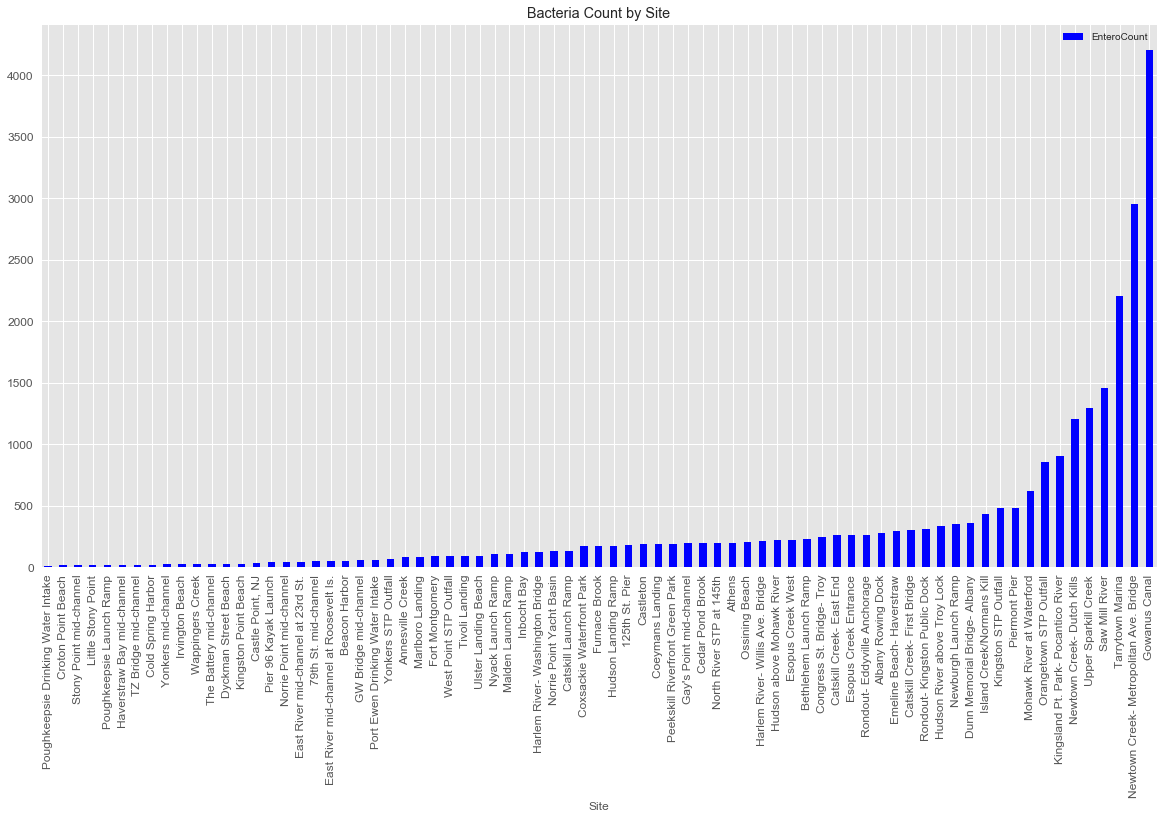

In [16]:
summary=summary.sort_values(by='EnteroCount')
summary.plot(x='Site',y='EnteroCount',kind='bar',color='b',fontsize=12,figsize=(20,10),title='Bacteria Count by Site')

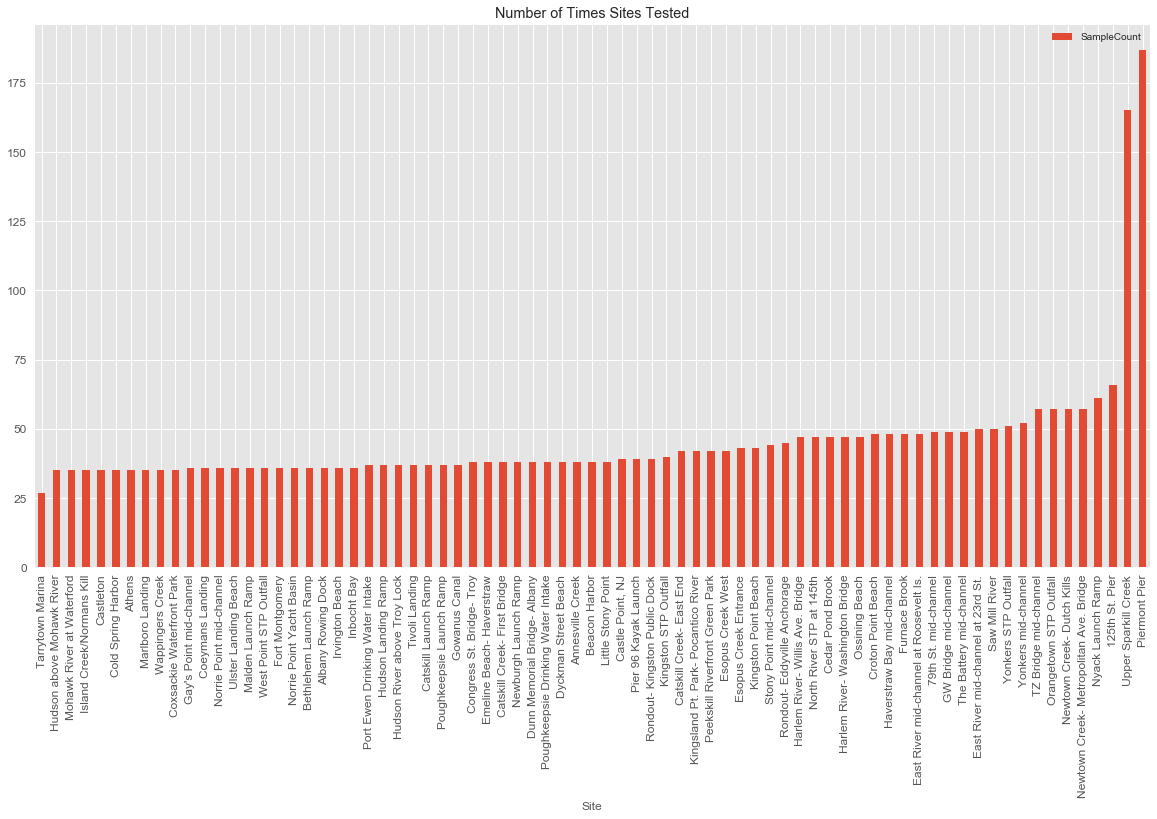

In [17]:
#which sites have been tested most regularly
summary=summary.sort_values(by='SampleCount')
summary.plot(x='Site',y='SampleCount',kind='bar',fontsize=12,figsize=(20,10),title="Number of Times Sites Tested")

In [18]:
calendar_s=river_data.sort_values(['Site','Date'])

In [19]:
calendar_s=calendar_s.groupby('Site')

In [20]:
calendar_s=calendar_s.diff()

In [21]:
calendar_s.head(n=20)

,Date,EnteroCount,FourDayRainTotal,SampleCount
2923,NaT,NaN,NaN,NaN
2919,1 days,-660.0,-0.1,0.0
2917,3 days,51.0,0.3,0.0
2916,5 days,-555.0,-0.3,0.0
2915,1 days,36.0,1.5,0.0
2914,19 days,-158.0,0.3,0.0
2913,210 days,-64.0,-2.2,0.0
2912,1 days,-62.0,0.0,0.0
2911,1 days,-13.0,0.0,0.0
2909,1 days,4.0,0.0,0.0


In [22]:
calendar_s=calendar_s['Date'].to_frame()

In [23]:
calendar_s.columns=['date_diff']

In [24]:
rev_data=pd.merge(river_data,calendar_s,left_index=True,right_index=True)

In [25]:
rev_data.head(n=5)

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount,date_diff
2923,125th St. Pier,2006-10-02,1433,0.5,66,NaT
2919,125th St. Pier,2006-10-03,773,0.4,66,1 days
2917,125th St. Pier,2006-10-06,824,0.7,66,3 days
2916,125th St. Pier,2006-10-11,269,0.4,66,5 days
2915,125th St. Pier,2006-10-12,305,1.9,66,1 days


In [26]:
rev_data.shape

(3397, 6)

In [27]:
rev_data.dtypes

Site                         object
Date                 datetime64[ns]
EnteroCount                   int64
FourDayRainTotal            float64
SampleCount                   int64
date_diff           timedelta64[ns]
dtype: object

In [28]:
# convert time delta to number/float for plotting and analysis
rev_data['days']=(pd.to_timedelta(rev_data['date_diff'])).astype('timedelta64[D]')

In [29]:
rev_data.dtypes

Site                         object
Date                 datetime64[ns]
EnteroCount                   int64
FourDayRainTotal            float64
SampleCount                   int64
date_diff           timedelta64[ns]
days                        float64
dtype: object

#### Histogram plot of days between test dates

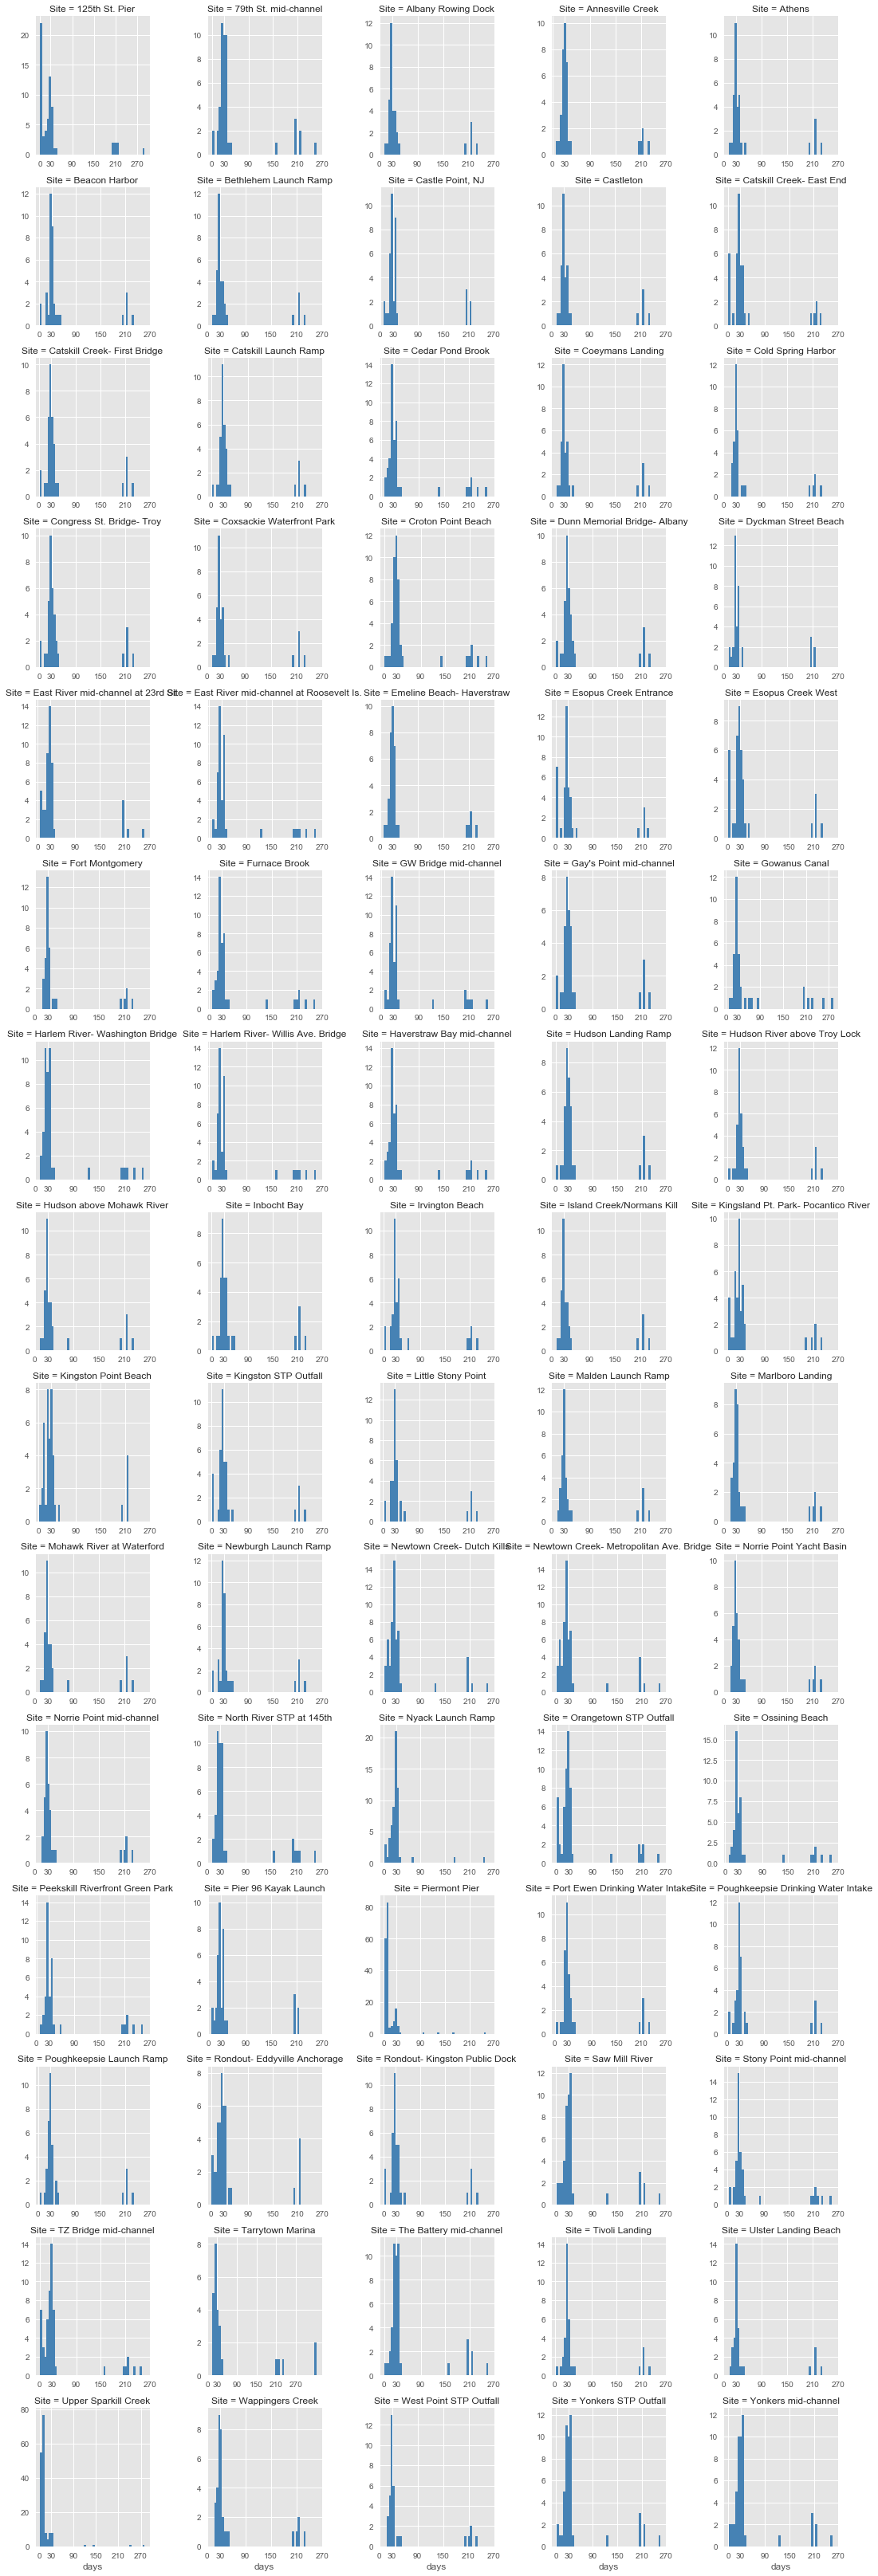

In [30]:
g = sns.FacetGrid(rev_data, col="Site",col_wrap=5, margin_titles=True,sharex=False,sharey=False)
g=(g.map(plt.hist, "days",color="steelblue", bins=48, lw=0).set(xticks=[0,30,90,150,210,270]))

A number of sites it seems have some breaks between the test days. In particular it seems that testing is done seasonally and so all sites have some large breaks, but some sites have fewer breaks than others. For example Upper Sparkill Creek. Testing is very regular with most of testing conducting less than 30 day gaps, and then too most of the testing done within 5-10 days. On the other hand, Gowanus canal, is not as regularly tested, with large number of test days greater than 5-10 days. 

#### Relationship between Rain Fall and Entero Counts

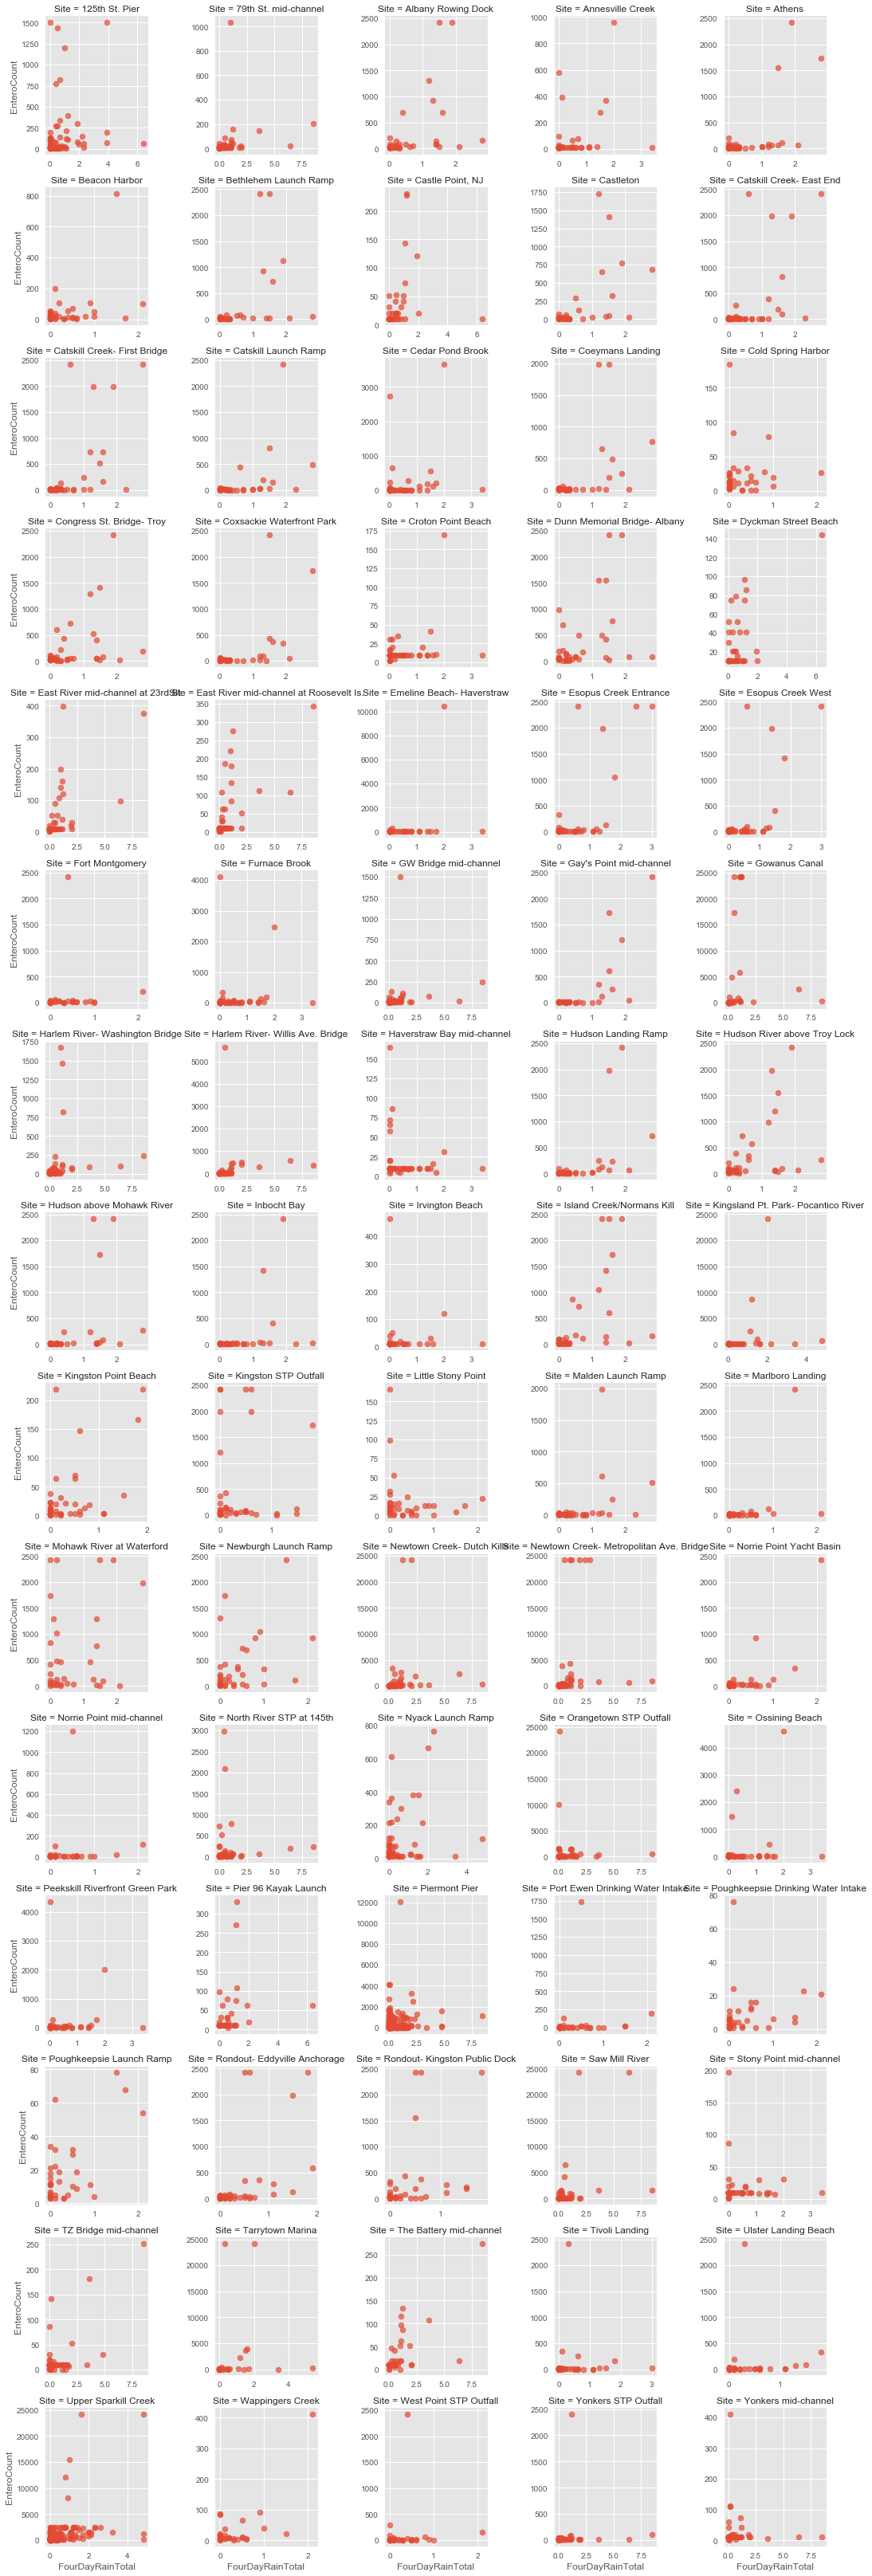

In [31]:
h = sns.FacetGrid(rev_data, col="Site", col_wrap=5,sharey=False, sharex=False)
h.map(plt.scatter, "FourDayRainTotal", "EnteroCount", alpha=.7)

The relationship between rain and Entrocount seems to be rather weak. 

#### Investigating the Relationship between Rain and EnteroCount

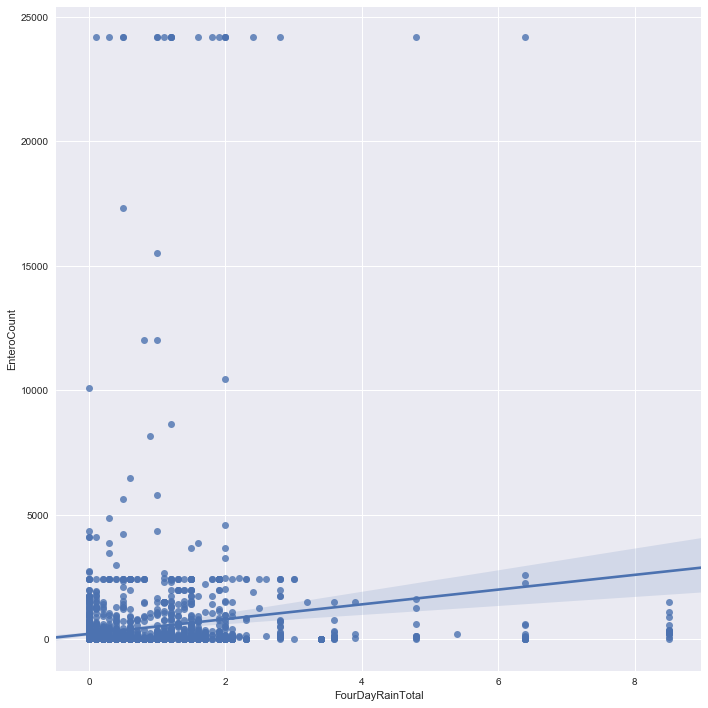

In [32]:
sns.set(color_codes=True)
sns.lmplot(x="FourDayRainTotal", y="EnteroCount", size=10,order=1, data=rev_data)

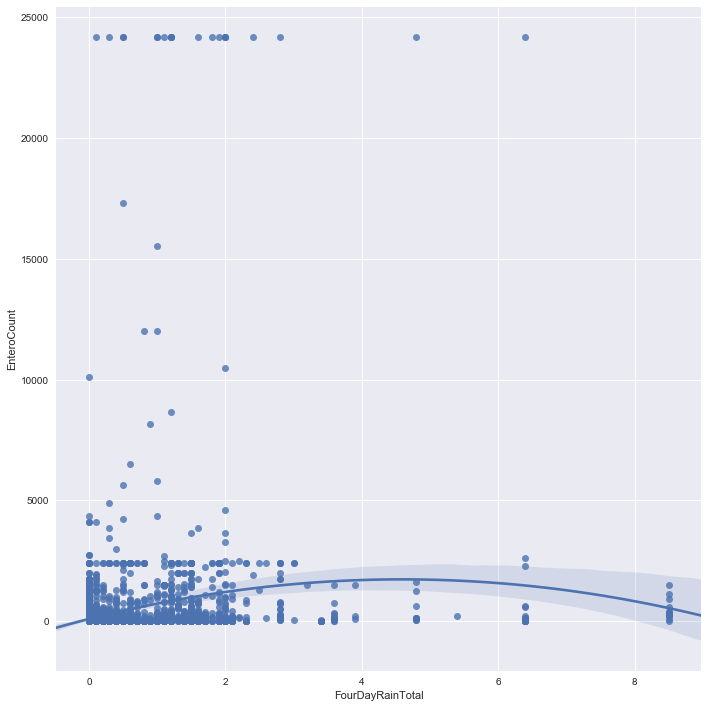

In [33]:
sns.lmplot(x="FourDayRainTotal", y="EnteroCount", size=10,order=2, data=rev_data)

It seems that overall there is weak relationship. High amounts of rain do intially raise the level of Enterocounts but very high amounts of rain tend to have diluting effect. That would be expected as Enterocounts are expressed in counts per ml and high amounts of rain would have diluting effect. On the other hand, high levels of rain would result in storm water over flow which would have a negative effect on water quality. 

#### Investigate the relationship further

In [34]:
rev_data['mnth']=pd.DatetimeIndex(rev_data['Date']).month

In [35]:
rev_data['yr']=pd.DatetimeIndex(rev_data['Date']).year

In [36]:
rev_data.head(n=5)

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount,date_diff,days,mnth,yr
2923,125th St. Pier,2006-10-02,1433,0.5,66,NaT,NaN,10,2006
2919,125th St. Pier,2006-10-03,773,0.4,66,1 days,1.0,10,2006
2917,125th St. Pier,2006-10-06,824,0.7,66,3 days,3.0,10,2006
2916,125th St. Pier,2006-10-11,269,0.4,66,5 days,5.0,10,2006
2915,125th St. Pier,2006-10-12,305,1.9,66,1 days,1.0,10,2006


##### Plots by Month - Seasonality

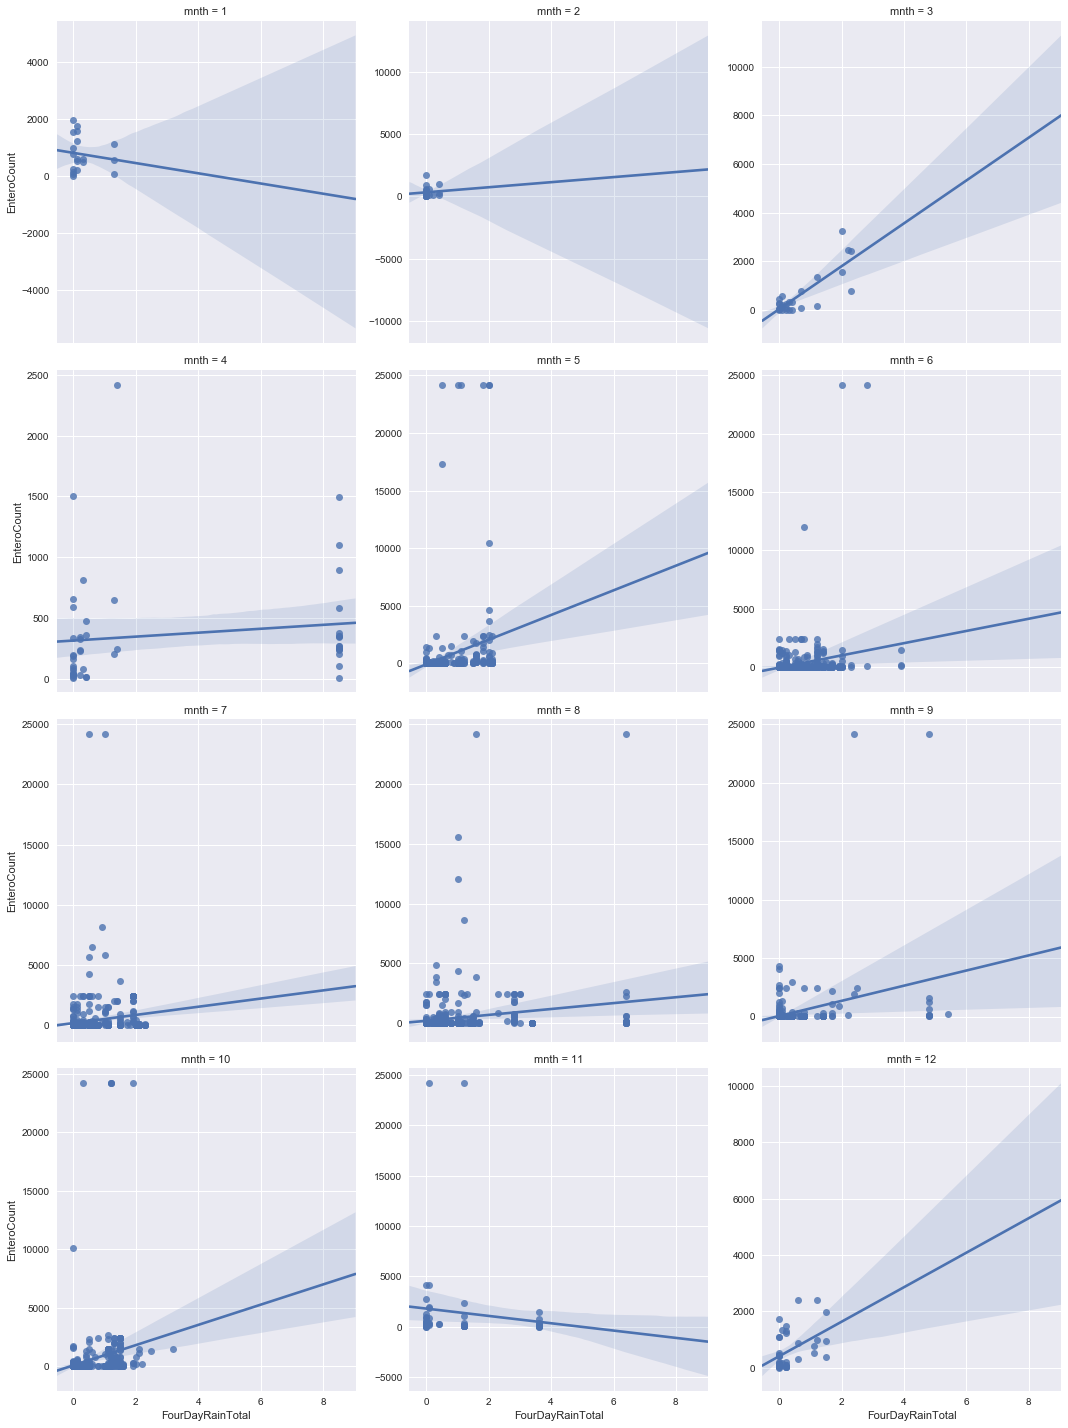

In [37]:
sns.lmplot(x="FourDayRainTotal", y="EnteroCount", size=5,order=1,col='mnth',col_wrap=3,sharey=False,data=rev_data)

##### Plots by Year - Capturing differences in Rain fall amounts

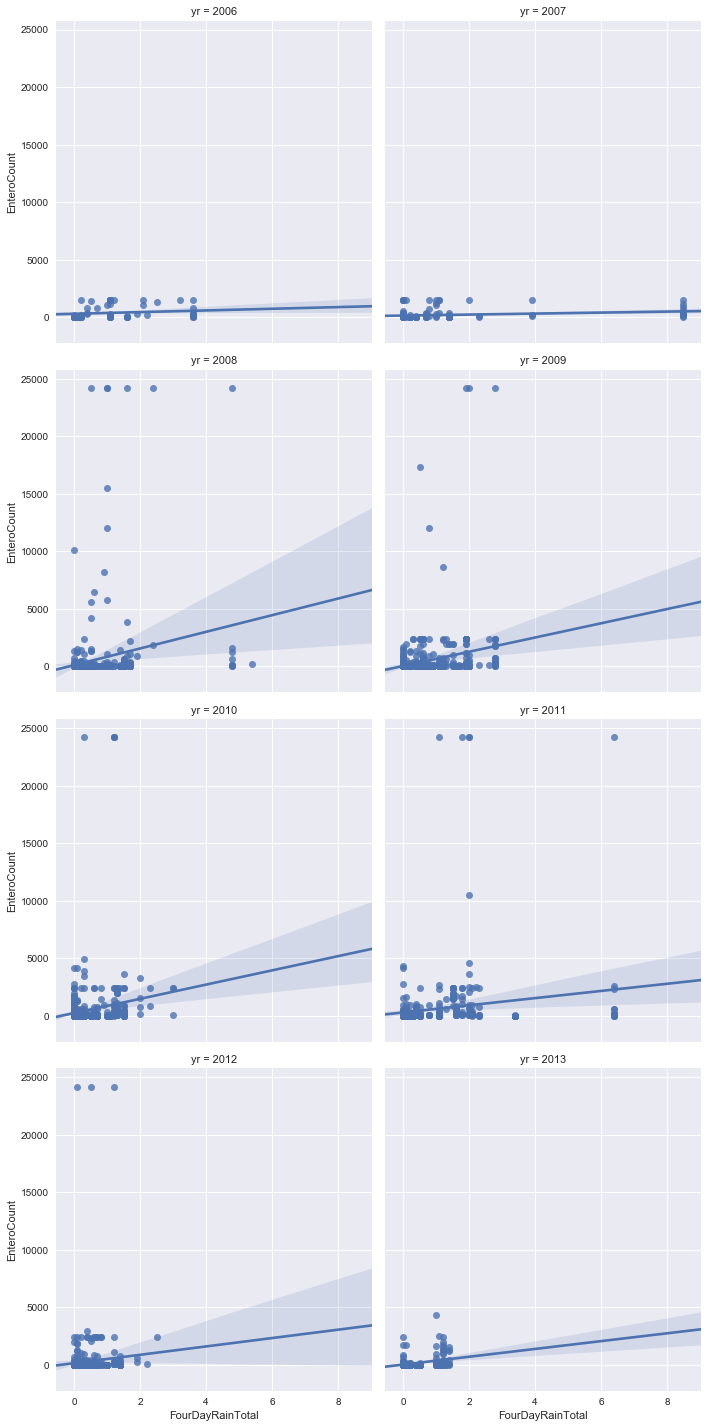

In [38]:
sns.lmplot(x="FourDayRainTotal", y="EnteroCount", size=5,order=1,col='yr',col_wrap=2, data=rev_data)